In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [25]:
df.duplicated().sum()

3854

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [29]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [30]:
num_attributes = df.select_dtypes(include=['int', 'float']).drop(columns='diabetes')
cat_attributes = df.select_dtypes(exclude=['int','float'])

In [31]:
num_attributes.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155


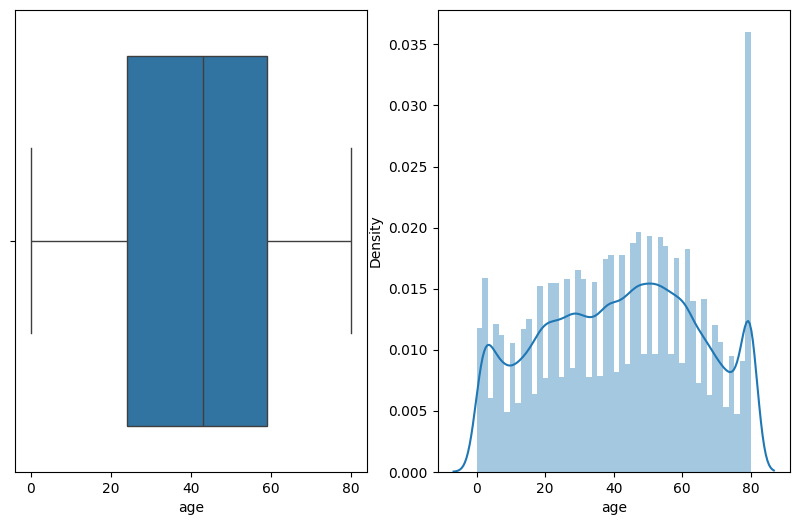

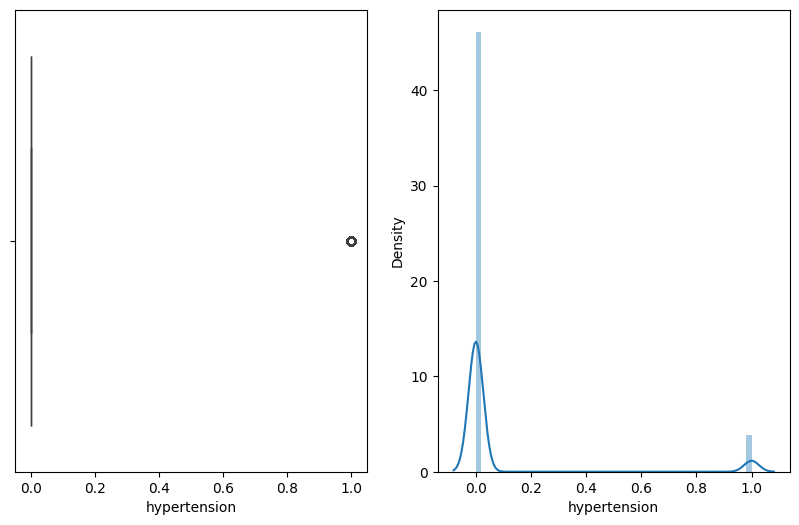

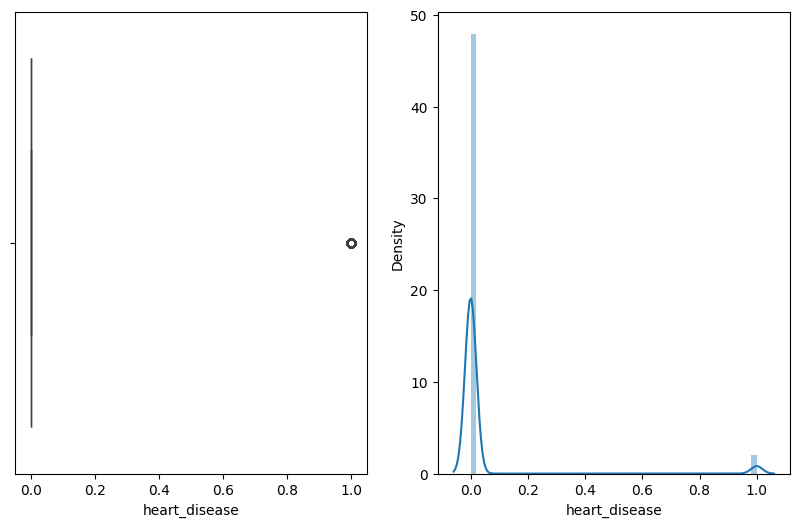

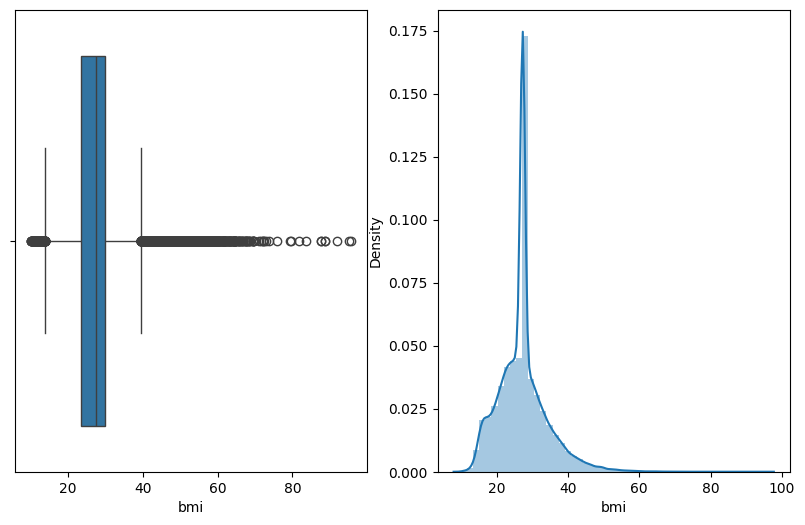

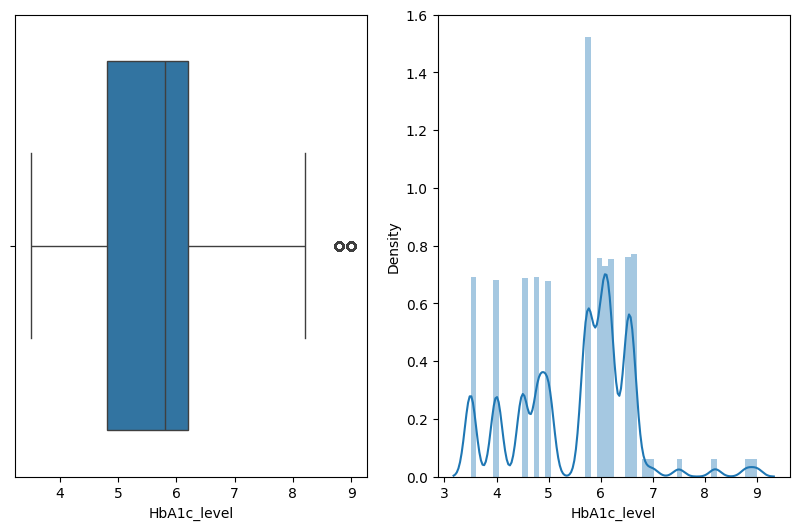

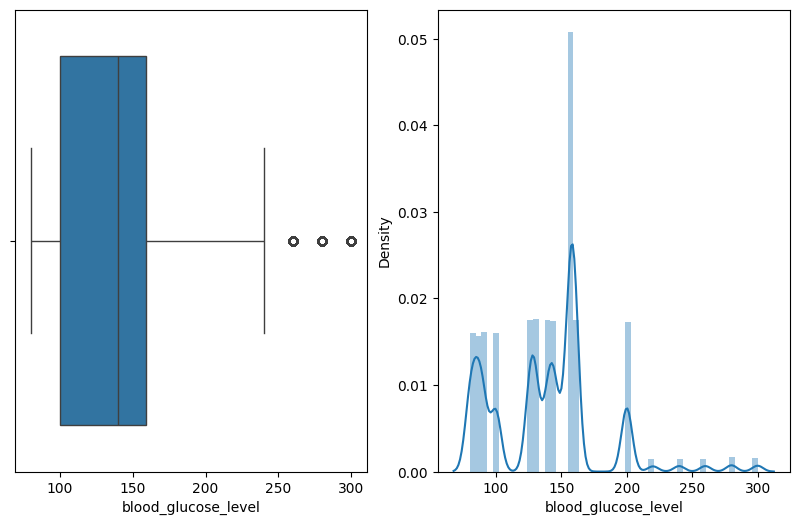

In [37]:
for col in num_attributes.columns:
  plt.figure(figsize=(10, 6))

  plt.subplot(1, 2, 1)
  sns.boxplot(x = col, data=df)

  plt.subplot(1, 2, 2)
  sns.distplot(df[col])


  plt.show()

In [35]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,96146.0,41.794326,22.462948,0.08,24.0,43.00,59.00,80.00
hypertension,96146.0,0.077601,0.267544,0.00,0.0,0.00,0.00,1.00
heart_disease,96146.0,0.040803,0.197833,0.00,0.0,0.00,0.00,1.00
bmi,96146.0,27.321461,6.767716,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96146.0,5.532609,1.073232,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96146.0,138.218231,40.909771,80.00,100.0,140.00,159.00,300.00


In [38]:
cat_attributes.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


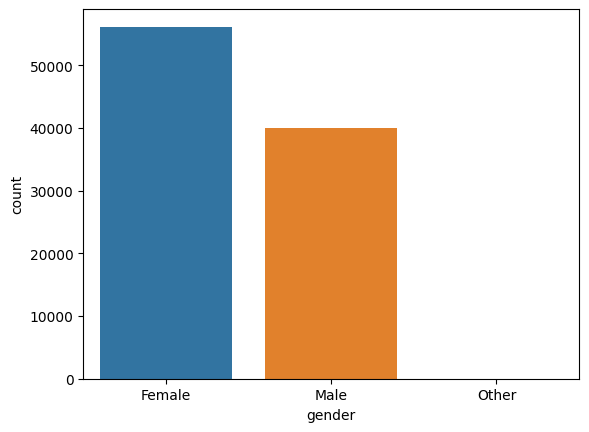

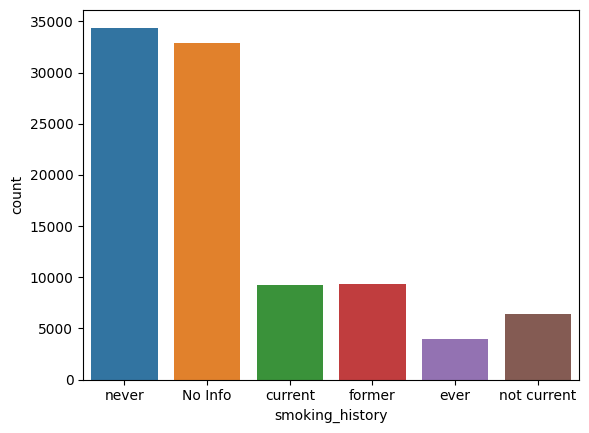

In [39]:
for col in cat_attributes.columns:
  sns.countplot(x = col,data = df, hue = col)
  plt.show()

In [40]:
for col in cat_attributes.columns:
  print(f"value counts for {col}")
  print(cat_attributes[col].value_counts())
  print('\n')


value counts for gender
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


value counts for smoking_history
smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64




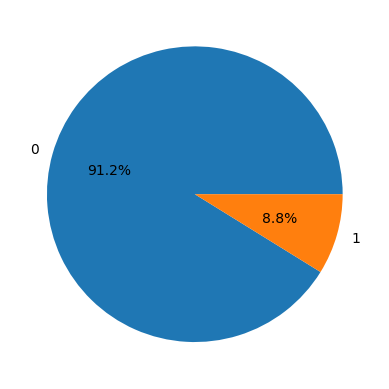

In [41]:
diabetes_counts = df['diabetes'].value_counts(normalize=True)

plt.pie(diabetes_counts.values, labels = diabetes_counts.index, autopct = '%1.1f%%')
plt.show()

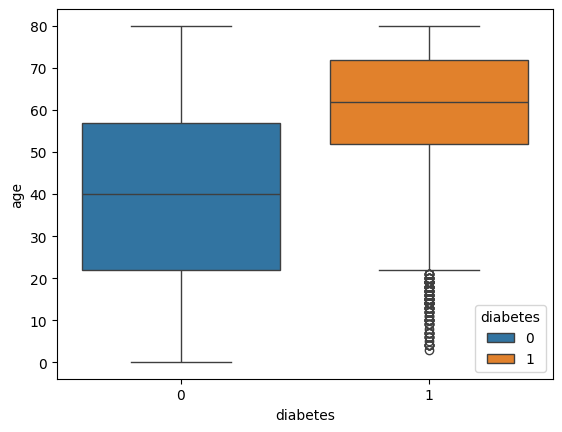

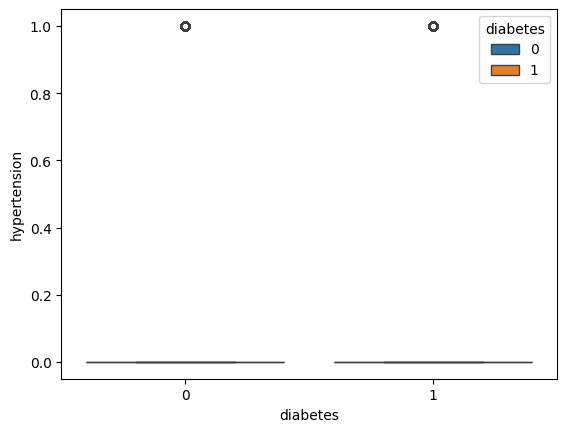

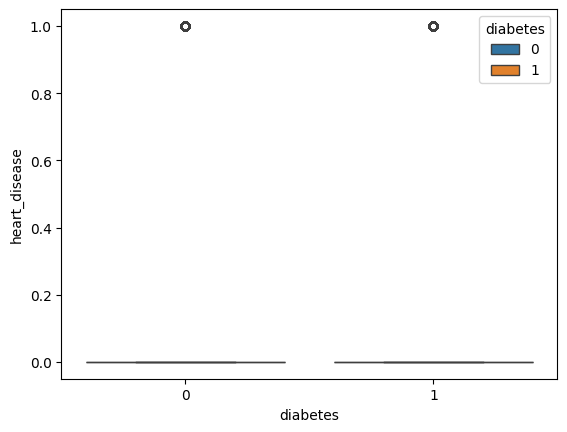

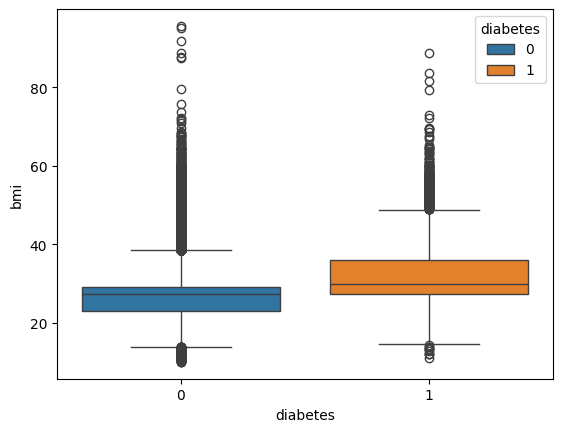

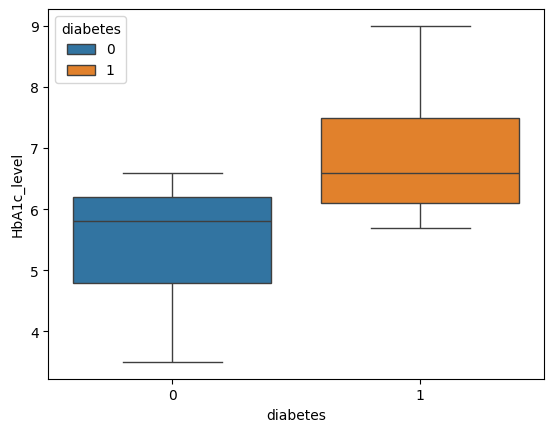

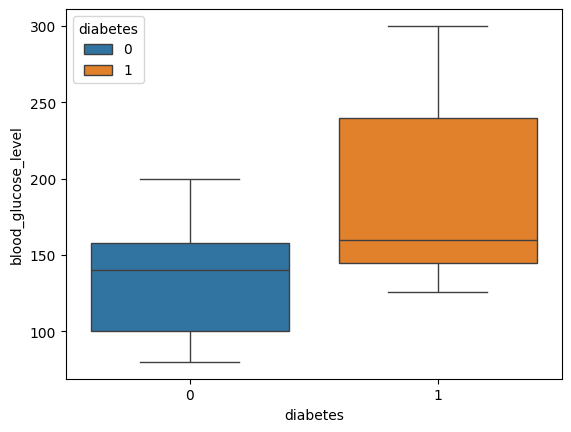

In [42]:
for col in num_attributes.columns:
  sns.boxplot(x = 'diabetes', y = col, data = df, hue = 'diabetes')
  plt.show()

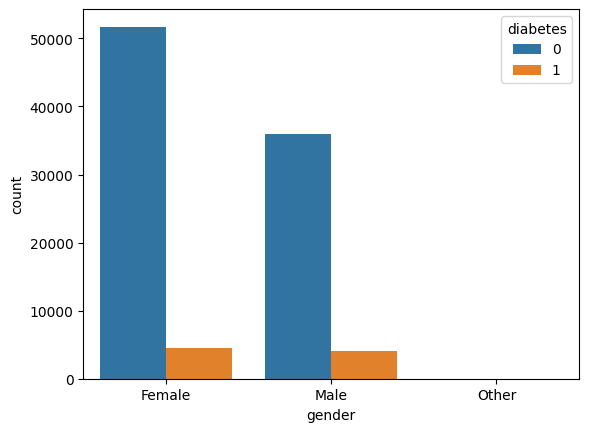

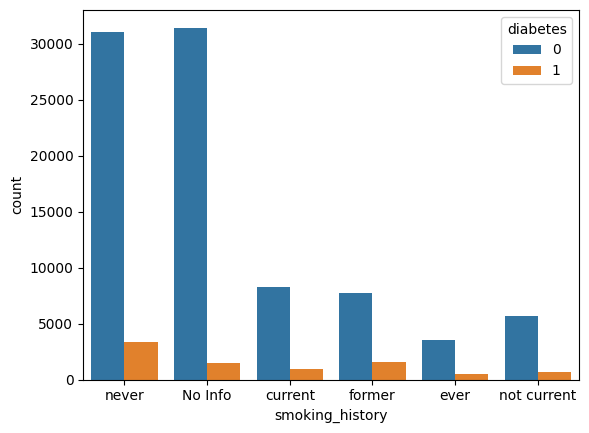

In [43]:
for col in cat_attributes.columns:
  sns.countplot(x = col, data = df, hue = 'diabetes')
  plt.show()

In [45]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [46]:
df = pd.get_dummies(df, columns = ['gender', 'smoking_history'], dtype = int)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


In [47]:
num_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df.drop(columns='diabetes')
y = df['diabetes']

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [59]:
X_train.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
70233,0.812805,0,0,-0.242387,0.437425,-1.175747,0,1,0,0,0,0,0,1,0
95154,-0.612356,0,0,-0.288324,-1.890696,0.535126,0,1,0,0,0,0,0,1,0
55028,-0.478747,0,0,0.002115,0.623674,1.512767,0,1,0,0,0,0,0,1,0
19688,-1.725764,0,0,-1.162604,-0.680073,0.412920,1,0,0,0,0,0,0,1,0
1674,0.144761,0,1,-1.036649,0.623674,-0.198106,1,0,0,0,1,0,0,0,0


In [60]:
X_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
5283,-0.345138,0,0,1.470609,-0.680073,0.412920,1,0,0,0,1,0,0,0,0
62771,1.035487,0,0,0.339972,0.158050,0.046305,0,1,0,0,1,0,0,0,0
61123,-1.804147,0,0,-1.555289,0.437425,-1.297953,0,1,0,1,0,0,0,0,0
81784,0.011152,0,0,0.391836,0.530549,0.046305,0,1,0,0,0,0,0,0,1
41968,-1.827306,0,0,-1.848692,0.437425,0.046305,0,1,0,1,0,0,0,0,0


In [64]:
y_train.value_counts()

,count
diabetes,
0,61365
1,5937


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
pred_train = dt_model.predict(X_train)
pred_test = dt_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))


Training Accuracy Score:  0.9993313720246055
Testing Accuracy Score:  0.9487241714047983


Precision:  0.696824224519941
Recall:  0.7414538310412574
F1-Score:  0.7184466019417476
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26299
           1       0.70      0.74      0.72      2545

    accuracy                           0.95     28844
   macro avg       0.84      0.86      0.85     28844
weighted avg       0.95      0.95      0.95     28844

Confusion Matrix
[[25478   821]
 [  658  1887]]


In [67]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

print("Training Accuracy Score: ", accuracy_score(y_train, pred_train))
print("Testing Accuracy Score: ", accuracy_score(y_test, pred_test))
print('\n')
print("Precision: ", precision_score(y_test, pred_test))
print("Recall: ", recall_score(y_test, pred_test))
print("F1-Score: ", f1_score(y_test, pred_test))
print("Classification Report: ")
print(classification_report(y_test, pred_test))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

Training Accuracy Score:  0.9993165136251523
Testing Accuracy Score:  0.9693870475662183


Precision:  0.9487041036717062
Recall:  0.6903732809430255
F1-Score:  0.7991812599499659
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26299
           1       0.95      0.69      0.80      2545

    accuracy                           0.97     28844
   macro avg       0.96      0.84      0.89     28844
weighted avg       0.97      0.97      0.97     28844

Confusion Matrix
[[26204    95]
 [  788  1757]]
